## Analyse Caractéristiques et Lieux

In [1]:
!pip install requests
!pip install os
!pip install matplotlib 
!pip install pandas
!pip install plotly
!pip install io
!pip install seaborn
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 KB 3.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 KB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 KB 47.8 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 7.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Importing packages

In [2]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly
import plotly.express as px
import io
import seaborn as sns
import numpy as np

import folium
from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'geopandas'

### Importing database

In [3]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2",
}
path='/home/onyxia/Projet-Python-pour-la-Data-Science/data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv


In [4]:
df_caract = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [5]:
# Base des lieux 
df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')
df_lieux.head()

/tmp/ipykernel_62477/2020527371.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [6]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route départementale",
    4: "Voie communale",
    5: "Hors réseau public",
    6: "Parc de stationnement",
    7: "Routes de métropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseigné",
    1: "À sens unique",
    2: "Bidirectionnelle",
    3: "À chaussées séparées",
    4: "Avec voies d’affectation variable"
}

vosp_labels = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie réservée"
}

prof_labels = {
    -1: "Non renseigné",
    1: "Plat",
    2: "Pente",
    3: "Sommet de côte",
    4: "Bas de côte"
}

plan_labels = {
    -1: "Non renseigné",
    1: "Partie rectiligne",
    2: "En courbe à gauche",
    3: "En courbe à droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Mouillée",
    3: "Flaques",
    4: "Inondée",
    5: "Enneigée",
    6: "Boue",
    7: "Verglacée",
    8: "Corps gras – huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d’échangeur",
    4: "Voie ferrée",
    5: "Carrefour aménagé",
    6: "Zone piétonne",
    7: "Zone de péage",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Sur chaussée",
    2: "Sur bande d’arrêt d’urgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie spéciale",
    8: "Autres"
}


In [7]:
lum_labels = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

agg_labels = {
    1: "Hors agglomération",
    2: "En agglomération"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection à plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage à niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte",
    4: "Neige - grêle",
    5: "Brouillard - fumée",
    6: "Vent fort - tempête",
    7: "Temps éblouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseigné",
    1: "Deux véhicules - frontale",
    2: "Deux véhicules – par l’arrière",
    3: "Deux véhicules – par le côté",
    4: "Trois véhicules et plus – en chaîne",
    5: "Trois véhicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


### Analyses 

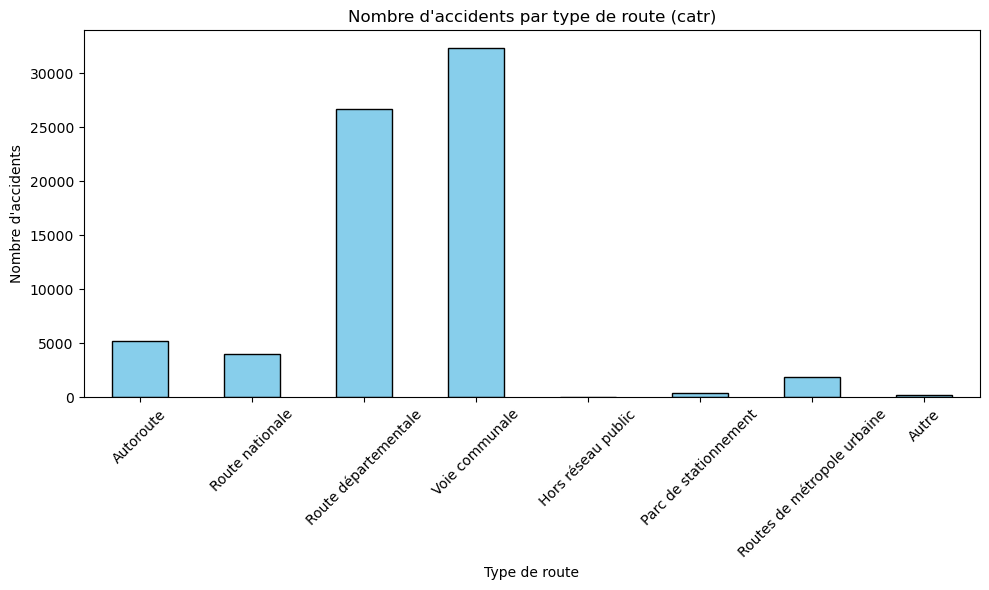

In [8]:
# Comptage des occurrences par catégorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

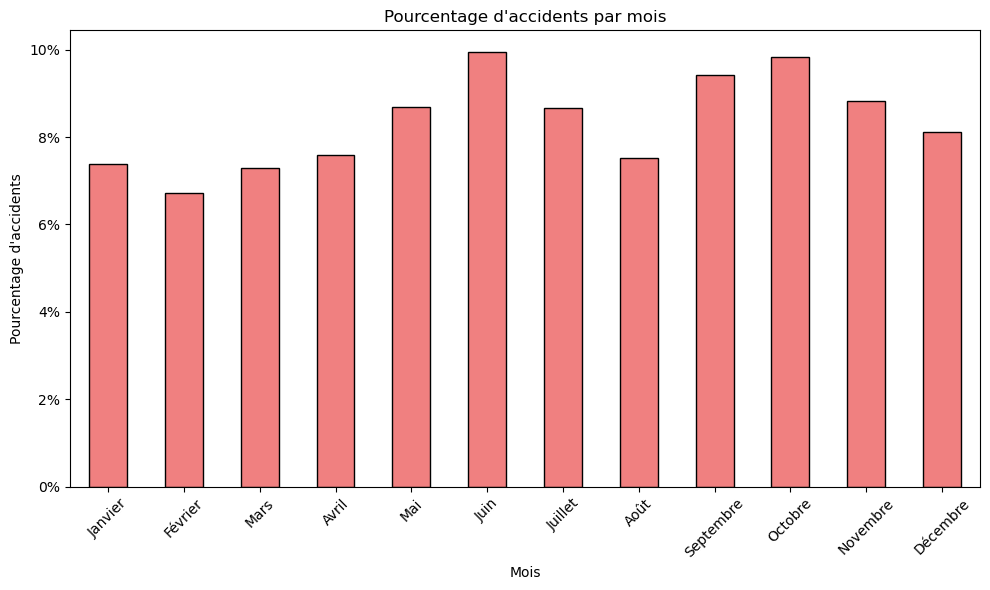

In [9]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Création du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

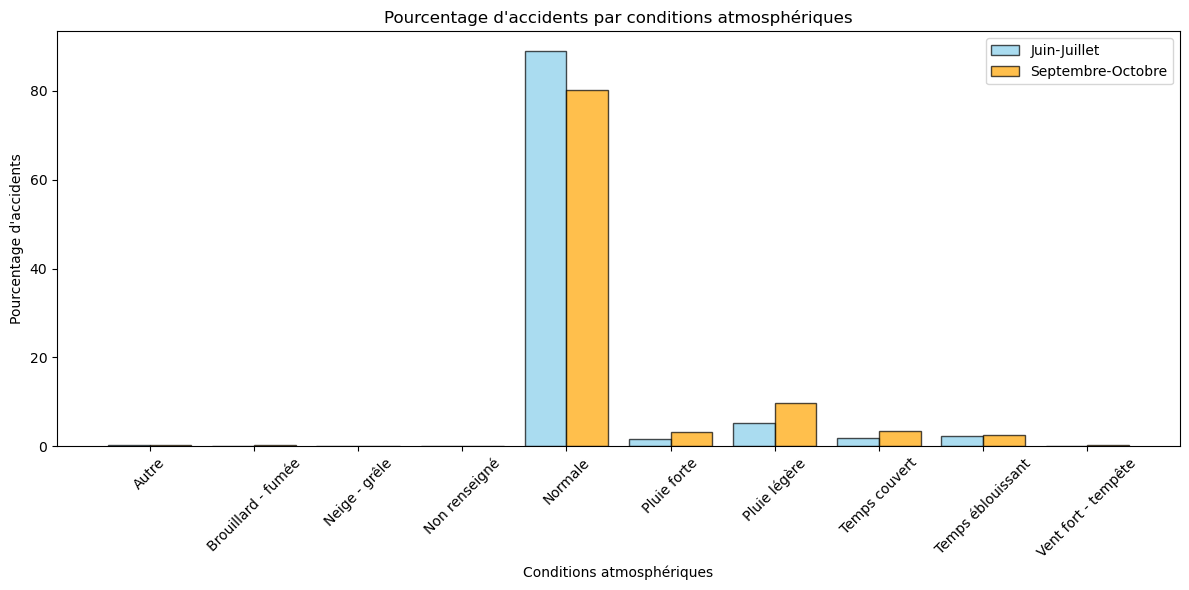

In [20]:
# Créer des copies explicites des DataFrames filtrés
data_jj = df_caract[df_caract['mois'].isin(months_jj)].copy()
data_so = df_caract[df_caract['mois'].isin(months_so)].copy()

# Remplacer les indices par leurs labels AVANT de calculer les pourcentages
data_jj['atm_label'] = data_jj['atm'].map(atm_labels)
data_so['atm_label'] = data_so['atm'].map(atm_labels)

# Compter les accidents par conditions atmosphériques pour chaque groupe
atm_counts_jj = data_jj['atm_label'].value_counts().sort_index()
atm_counts_so = data_so['atm_label'].value_counts().sort_index()

# Calcul des pourcentages pour chaque groupe
total_jj = atm_counts_jj.sum()
total_so = atm_counts_so.sum()

jj_percentages = {label: (atm_counts_jj.get(label, 0) / total_jj) * 100 for label in atm_counts_jj.index}
so_percentages = {label: (atm_counts_so.get(label, 0) / total_so) * 100 for label in atm_counts_so.index}

# Préparation des données pour affichage côte à côte
combined_labels = sorted(set(atm_counts_jj.index).union(set(atm_counts_so.index)))
jj_values = [jj_percentages.get(label, 0) for label in combined_labels]
so_values = [so_percentages.get(label, 0) for label in combined_labels]

x = np.arange(len(combined_labels))  # Positions pour les groupes de barres

# Création du graphique
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Barres pour Juin-Juillet
plt.bar(x - bar_width / 2, jj_values, bar_width, color='skyblue', edgecolor='black', label='Juin-Juillet', alpha=0.7)

# Barres pour Septembre-Octobre
plt.bar(x + bar_width / 2, so_values, bar_width, color='orange', edgecolor='black', label='Septembre-Octobre', alpha=0.7)

# Personnalisation du graphique
plt.title("Pourcentage d'accidents par conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=x, labels=combined_labels, rotation=45)
plt.legend()
plt.tight_layout()

# Affichage du graphique
plt.show()


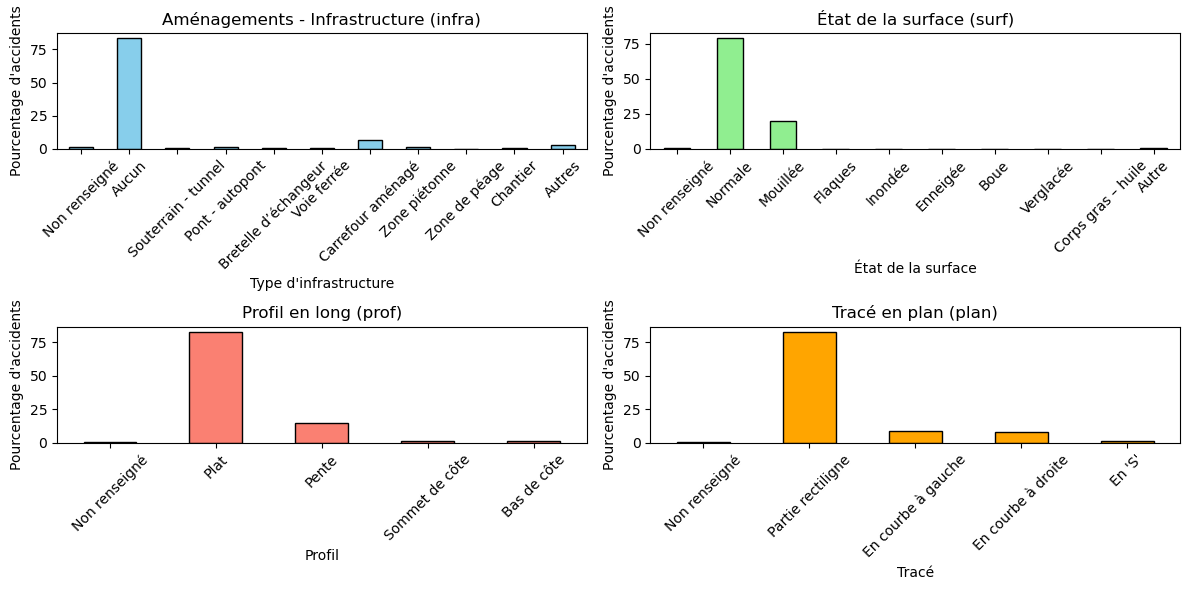

In [19]:
# Calcul des pourcentages pour chaque variable
infra_percentages = (infra_counts / infra_counts.sum()) * 100
surf_percentages = (surf_counts / surf_counts.sum()) * 100
prof_percentages = (prof_counts / prof_counts.sum()) * 100
plan_percentages = (plan_counts / plan_counts.sum()) * 100

# Création des graphiques pour chaque variable
plt.figure(figsize=(12, 6))

# Graphique pour les infrastructures
plt.subplot(2, 2, 1)
infra_percentages.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Aménagements - Infrastructure (infra)")
plt.xlabel("Type d'infrastructure")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(rotation=45)

# Graphique pour l'état de la surface
plt.subplot(2, 2, 2)
surf_percentages.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("État de la surface (surf)")
plt.xlabel("État de la surface")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(rotation=45)

# Graphique pour le profil en long
plt.subplot(2, 2, 3)
prof_percentages.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Profil en long (prof)")
plt.xlabel("Profil")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(rotation=45)

# Graphique pour le tracé en plan
plt.subplot(2, 2, 4)
plan_percentages.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Tracé en plan (plan)")
plt.xlabel("Tracé")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 1. Aménagements - Infrastructure (infra) :

La majorité des accidents se produisent dans des zones sans infrastructure particulière (Aucun), ce qui pourrait inclure des routes standard sans aménagements spécifiques.
Les infrastructures comme les Souterrains - tunnels, Ponts, ou Zones piétonnes enregistrent très peu d'accidents, probablement en raison d'une conception adaptée ou d'une moindre fréquentation.
Une proportion significative d'accidents n'a pas de type d'infrastructure renseigné (Non renseigné), ce qui pourrait biaiser l'analyse.

Hypothèse : Les zones standard et non aménagées peuvent représenter des risques accrus, notamment en raison d'un manque de signalisation ou d'infrastructures de sécurité.
#### 2. État de la surface (surf) :

L'état Normal de la surface est de loin le plus fréquent pour les accidents, ce qui peut indiquer que la météo ou les conditions de la chaussée ne sont pas systématiquement les principaux facteurs.
Les états Mouillée et d'autres conditions comme Verglacée ou Boueuse représentent une faible proportion d'accidents.
Une proportion importante reste Non renseigné.

Hypothèse : Les accidents se produisent souvent dans des conditions normales, suggérant que d'autres facteurs comme la vitesse, l'inattention, ou les caractéristiques des routes (profil, plan) jouent un rôle clé.

# Lieux

In [ ]:
accidents_par_departement = df_caract.groupby('dep').size().reset_index(name='nombre_accidents')
accidents_par_departement.head()

,dep,nombre_accidents
0,01,382
1,02,253
2,03,235
3,04,193
4,05,201


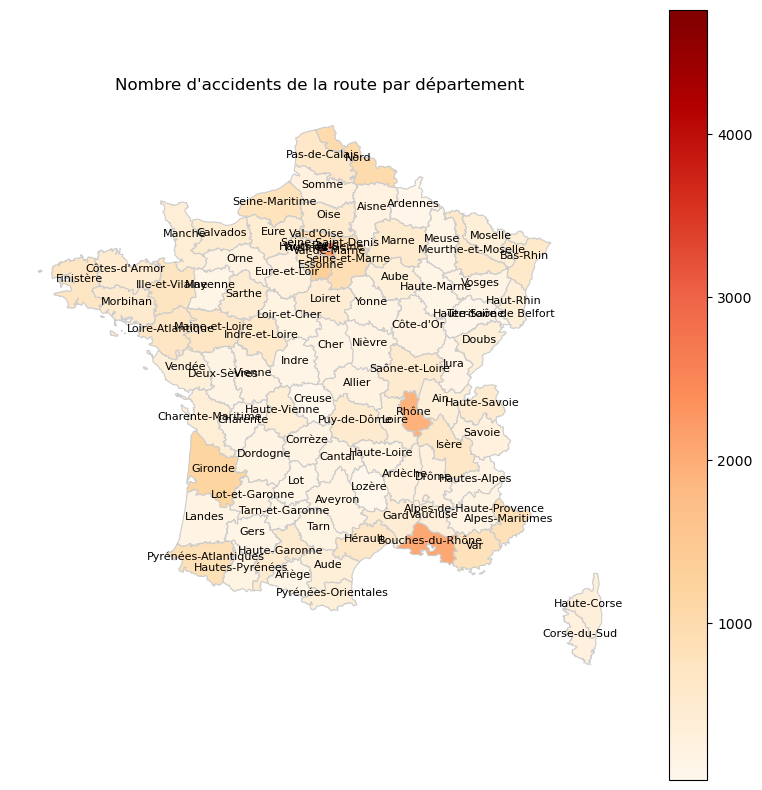

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
france_map = france_map.merge(accidents_par_departement, left_on="code", right_on="dep")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
france_map.plot(column="nombre_accidents", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

#Ajout des noms de départements
for idx, row in france_map.iterrows():
    if not pd.isna(row['nom']):  # Vérifie que le nom est défini
        ax.annotate(
            text=row['nom'],  # Texte à afficher (nom du département)
            xy=row['geometry'].centroid.coords[0],  # Position (centre du département)
            ha='center', fontsize=8, color='black'  # Alignement et style
        )

plt.title("Nombre d'accidents de la route par département")
plt.axis("off")
plt.show()

In [ ]:
# Trier les départements par nombre d'accidents en ordre décroissant
top_departements = accidents_par_departement.sort_values(by='nombre_accidents', ascending=False).head(5)

# Afficher les résultats
print(top_departements)

   dep  nombre_accidents
75  75              4763
93  93              2650
92  92              2563
94  94              2204
12  13              2057




#### Départements à forte densité d'accidents :
Les départements les plus touchés par les accidents sont clairement marqués en rouge foncé.
Ces zones incluent principalement des départements urbains tels que Paris (75) et certains départements densément peuplés comme les Bouches-du-Rhône (13) ou le Rhône (69).

#### Départements avec un faible nombre d'accidents :
Les départements ruraux ou peu densément peuplés présentent un faible nombre d'accidents, visibles par leur coloration plus claire.
Ces zones incluent souvent des régions moins urbanisées, avec une densité de population plus faible et un trafic routier moindre.

#### Concentration géographique :
La distribution des accidents semble liée à la densité de population et à la présence de grandes agglomérations, où le trafic est naturellement plus dense.

In [ ]:
dep_IDF = ["75", "77", "78", "91", "92", "93", "94", "95"]
accidents_idf = df_caract[df_caract['dep'].isin(dep_IDF)]

# Remplacer les virgules par des points et convertir en float
#accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
#accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)

accidents_idf.head()

/tmp/ipykernel_54938/4290649706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
/tmp/ipykernel_54938/4290649706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,48.732484,2.446876
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,48.785810,2.492170


In [ ]:


accidents_coords = accidents_idf[['lat', 'long']].dropna()

# Initialiser la carte centrée sur l'Île-de-France
map_idf = folium.Map(location=[48.8566, 2.3522], zoom_start=10, width='800px', height='400px', control_scale=False)

# Ajouter la carte de densité
HeatMap(
    data=accidents_coords.values,
    radius=10,               
    blur=15,                 
    max_zoom=10,             
    min_opacity=0.2,         
    gradient={               
        0.2: 'blue',
        0.4: 'lime',
        0.6: 'yellow',
        0.8: 'orange',
        1.0: 'red'
    }
).add_to(map_idf)


# Afficher la carte
map_idf

La carte précédente a mis en évidence une forte concentration d'accidents en Île-de-France. En nous focalisant davantage sur cette région, la nouvelle carte révèle une densité particulièrement élevée d'accidents dans l'hypercentre de Paris. Ces concentrations semblent se situer principalement le long des grands axes routiers, tels que les boulevards périphériques et les artères principales, qui sont les plus empruntés par les usagers. Cela pourrait s'explique par le flux important de véhicules et de piétons dans ces zones, où la densité de population et l'activité économique sont également les plus élevées.

In [ ]:
import pandas as pd
import requests

# URL du fichier XLS contenant les données de population par département
url = "https://www.insee.fr/fr/statistiques/fichier/7752095/estim-pop-dep-sexe-gca-1975-2024.xls"

try:
    # Télécharger le fichier XLS
    response = requests.get(url)
    response.raise_for_status()  # Vérifie que la requête a réussi

    # Sauvegarder le fichier XLS en entier localement
    with open("estim-pop-dep-sexe-gca-1975-2024.xls", "wb") as file:
        file.write(response.content)
    print("Fichier téléchargé et enregistré sous 'estim-pop-dep-sexe-gca-1975-2024.xls'")

    # Charger les données dans un DataFrame pandas
    data = pd.read_excel("estim-pop-dep-sexe-gca-1975-2024.xls", sheet_name=None, engine='xlrd')  # Charger toutes les feuilles

    # Afficher les noms des feuilles pour choisir celle à traiter
    print("Feuilles disponibles :", data.keys())

    # Sélectionner une feuille spécifique (par exemple, la première)
    sheet_name = list(data.keys())[2]  # Adapte selon le nom exact de la feuille
    population_data = data[sheet_name]



    # Sauvegarder la feuille sélectionnée dans un fichier CSV local
    population_data.to_csv("estim_pop_departement.csv", index=False, encoding="utf-8")
    print("Fichier 'estim_pop_departement.csv' enregistré avec succès !")

except ImportError as e:
    print("Erreur : xlrd n'est pas installé. Installez-le avec `pip install xlrd`.")
except requests.RequestException as e:
    print("Erreur lors du téléchargement des données :", e)
except Exception as e:
    print("Erreur lors du traitement des données :", e)


Fichier téléchargé et enregistré sous 'estim-pop-dep-sexe-gca-1975-2024.xls'
Feuilles disponibles : dict_keys(['À savoir', '2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975'])
Fichier 'estim_pop_departement.csv' enregistré avec succès !


In [ ]:
import pandas as pd

# Chemin du fichier local
file_path = 'estim-pop-dep-sexe-gca-1975-2024.xls'

try:
    # Charger la feuille 2023
    data_2023 = pd.read_excel(file_path, sheet_name='2023', engine='xlrd', header=None)

    # Extraire les colonnes pertinentes
    df_population = data_2023.iloc[5:101, [0, 7]]  # Lignes 6 à 101, colonnes 1 et 8

    # Renommer les colonnes pour plus de clarté
    df_population.columns = ['Département', 'Population']

    # Supprimer les lignes contenant des valeurs nulles, si nécessaire
    df_population.dropna(inplace=True)

    # Sauvegarder dans un fichier CSV
    df_population.to_csv("population_2023.csv", index=False, encoding='utf-8')
    print("Fichier 'population_2023.csv' créé avec succès.")

except Exception as e:
    print(f"Erreur lors du traitement du fichier : {e}")


Fichier 'population_2023.csv' créé avec succès.


In [ ]:
# Chemin du fichier CSV
file_path = "population_2023.csv"

# Charger le fichier CSV en DataFrame
df_population = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame
print(df_population.head())

  Département  Population
0          01      674071
1          02      523308
2          03      333355
3          04      167334
4          05      141438


In [ ]:
merged_df = pd.merge(
    accidents_par_departement,
    df_population,
    left_on='dep',  # Nom de la colonne département dans accidents_par_departement
    right_on='Département',  # Nom de la colonne département dans df_population
    how='inner'
)

# Calcul du nombre d'accidents par habitant
merged_df['accidents_par_habitant'] = merged_df['nombre_accidents'] / merged_df['Population']

print(merged_df.head())


  dep  nombre_accidents Département  Population  accidents_par_habitant
0  01               382          01      674071                0.000567
1  02               253          02      523308                0.000483
2  03               235          03      333355                0.000705
3  04               193          04      167334                0.001153
4  05               201          05      141438                0.001421


  code           nom                                           geometry
0   02         Aisne  POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21...
1   10          Aube  POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...
2   14      Calvados  POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...
3   15        Cantal  POLYGON ((2.50841 45.4785, 2.52444 45.4807, 2....
4   28  Eure-et-Loir  POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...


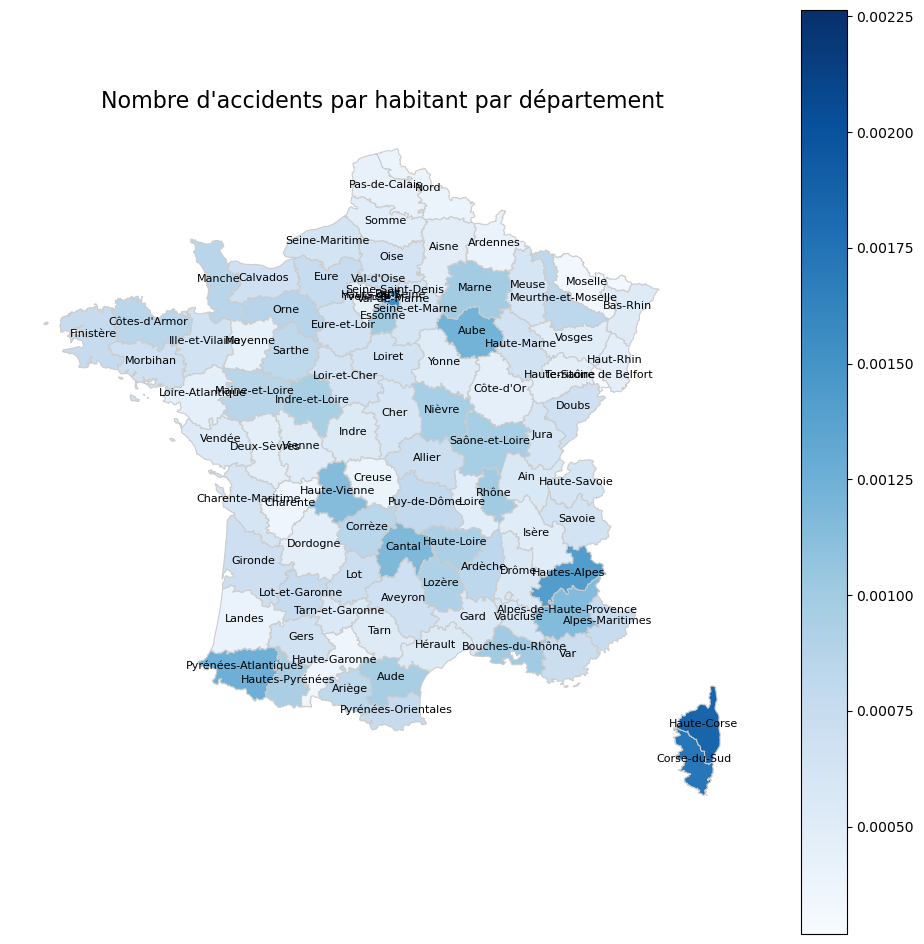

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")

# Vérifier la structure des données de la carte
print(france_map.head())

# Jointure entre la carte et les données des accidents


france_map = france_map.merge(merged_df, left_on="code", right_on="dep", how="left")

# Création de la carte
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
france_map.plot(
    column="accidents_par_habitant",  # Colonne à visualiser
    cmap="Blues",                    # Palette de couleurs
    linewidth=0.8,                   # Épaisseur des frontières
    ax=ax,                           # Axes matplotlib
    edgecolor="0.8",                 # Couleur des frontières
    legend=True                      # Ajouter une légende
)

#Ajout des noms de départements
for idx, row in france_map.iterrows():
    if not pd.isna(row['nom']):  # Vérifie que le nom est défini
        ax.annotate(
            text=row['nom'],  # Texte à afficher (nom du département)
            xy=row['geometry'].centroid.coords[0],  # Position (centre du département)
            ha='center', fontsize=8, color='black'  # Alignement et style
        )

# Ajouter un titre et masquer les axes
plt.title("Nombre d'accidents par habitant par département", fontsize=16)
plt.axis("off")  # Désactiver les axes

# Afficher la carte
plt.show()

In [ ]:
# Trier les départements par accidents par habitant en ordre décroissant
top_departments = merged_df.sort_values(by='accidents_par_habitant', ascending=False).head(5)

# Afficher les colonnes pertinentes
print("Les 5 départements avec le plus grand nombre d'accidents par habitant :")
print(top_departments[['Département', 'accidents_par_habitant', 'nombre_accidents', 'Population']])


Les 5 départements avec le plus grand nombre d'accidents par habitant :
   Département  accidents_par_habitant  nombre_accidents  Population
75          75                0.002264              4763     2104154
29          2B                0.001853               346      186773
28          2A                0.001722               286      166078
93          93                0.001568              2650     1690411
92          92                0.001557              2563     1646445


Une question légitime soulevée précédemment était de savoir si le nombre d'accidents était directement corrélé à la population des départements. Pour y répondre, la carte précédente présente le nombre d'accidents rapporté au nombre d'habitants de chaque département. Cette visualisation met en évidence que, bien que Paris conserve une nette première place en termes d'accidents par habitant, deux départements corses se distinguent également par un ratio élevé. Ces résultats contrastent avec ceux des départements plus peuplés comme le Rhône, qui, malgré un nombre absolu élevé d'accidents, affiche un ratio inférieur en raison de sa densité de population. Ces observations soulignent que les départements à faible population, comme en Corse, peuvent enregistrer des ratios élevés, potentiellement dus à des facteurs tels qu'une infrastructure routière limitée, des comportements à risque ou des spécificités géographiques. Une analyse plus approfondie serait nécessaire pour comprendre les causes sous-jacentes dans ces zones.

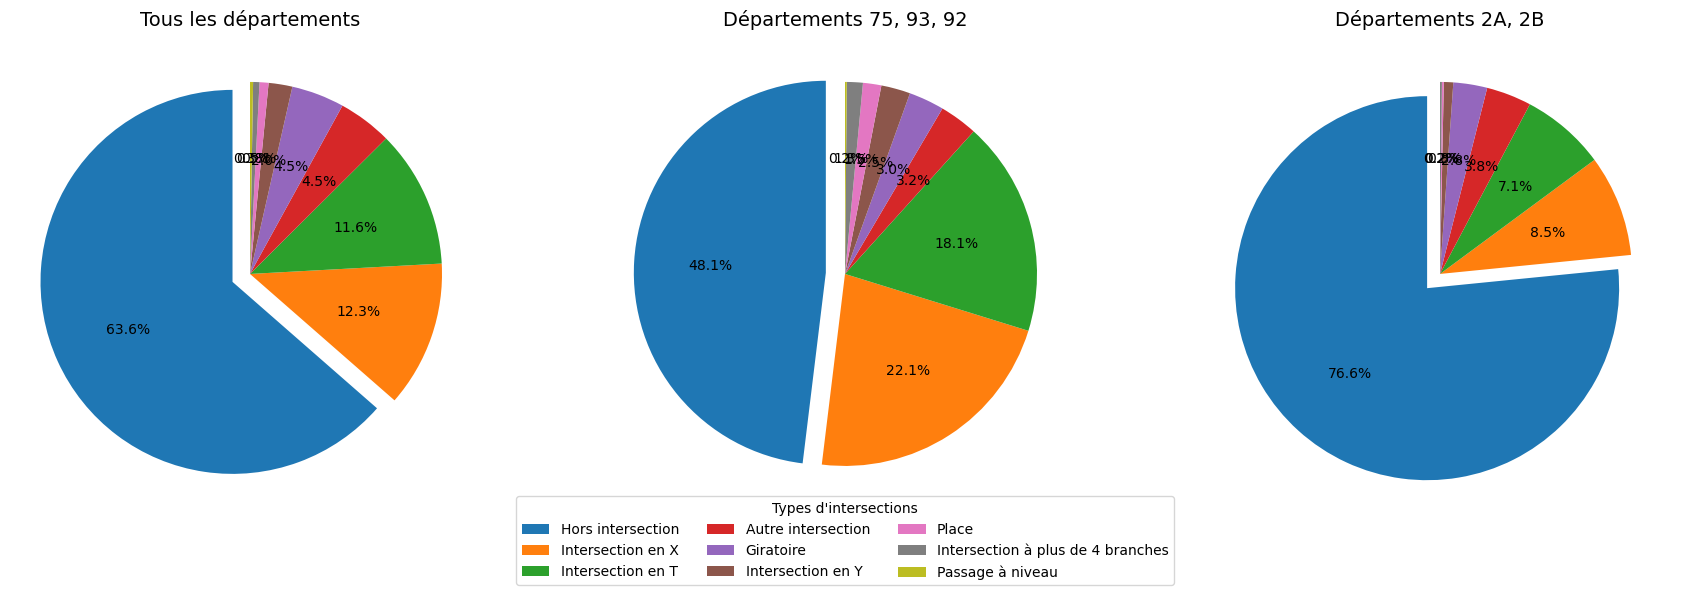

In [ ]:
# Création des diagrammes circulaires
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Diagramme pour tous les départements
axes[0].pie(
    int_counts_all,
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    colors=plt.cm.tab10.colors,
    explode=[0.1 if i == int_counts_all.idxmax() else 0 for i in int_counts_all.index],
)
axes[0].set_title("Tous les départements", fontsize=14)

# Diagramme pour les départements 75, 93, 92
axes[1].pie(
    int_counts_75_93_92,
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    colors=plt.cm.tab10.colors,
    explode=[0.1 if i == int_counts_75_93_92.idxmax() else 0 for i in int_counts_75_93_92.index],
)
axes[1].set_title("Départements 75, 93, 92", fontsize=14)

# Diagramme pour les départements 2A et 2B
axes[2].pie(
    int_counts_9A_9B,
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    colors=plt.cm.tab10.colors,
    explode=[0.1 if i == int_counts_9A_9B.idxmax() else 0 for i in int_counts_9A_9B.index],
)
axes[2].set_title("Départements 2A, 2B", fontsize=14)

# Ajouter une légende commune sous la figure
fig.legend(
    labels=int_counts_all.index,  # Utiliser les labels globaux
    loc='lower center',  # Placer la légende en bas
    ncol=3,  # Nombre de colonnes dans la légende
    fontsize=10,
    title="Types d'intersections"
)

# Ajuster les espaces pour éviter la superposition
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Ajouter de l'espace en bas pour la légende
plt.show()


Les diagrammes montrent la répartition des accidents par type d’intersection à trois échelles : nationale, départements à forte densité urbaine (75, 92, 93), et départements à fort ratio accidents/habitants (2A, 2B).

Tous les départements
63,6 % des accidents se produisent hors intersection, ce qui domine largement.
Les intersections en X (12,3 %) et en T (11,6 %) concentrent la majorité des accidents restants, reflétant leur fréquence dans le réseau routier.
Départements 75, 92, 93 (zones urbaines)
La proportion d'accidents hors intersection baisse à 48,1 %, au profit des intersections en X (22,1 %) et en T (18,1 %).
Cela s’explique par la densité des carrefours et le trafic élevé dans ces zones.
Départements 2A, 2B (zones rurales/montagneuses)
Les accidents hors intersection augmentent à 76,6 %, en raison des routes sinueuses et du faible nombre d’intersections.
Les intersections en X et en T représentent une faible part (8,5 % et 7,1 %, respectivement).

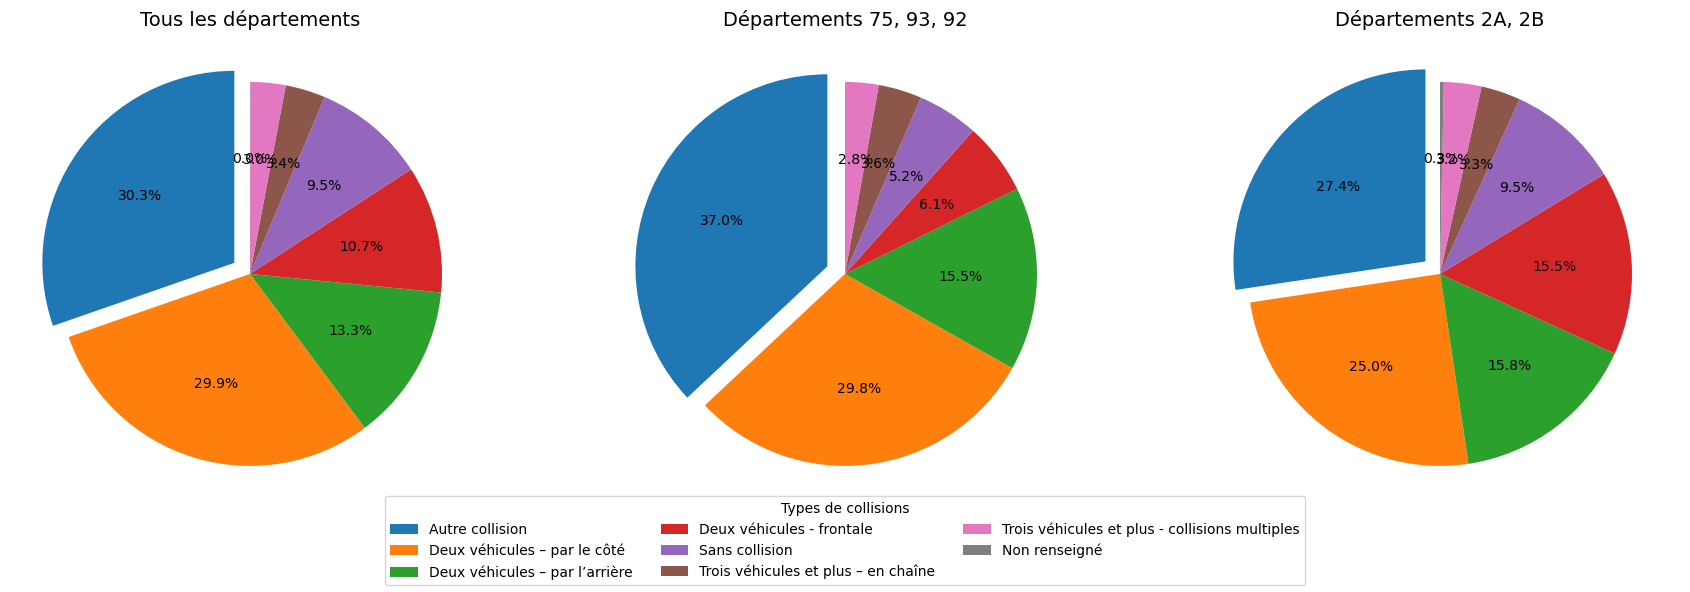

In [ ]:
# Remplacer les valeurs de la colonne 'col' par leurs labels en utilisant le dictionnaire
df_caract['col_label'] = df_caract['col'].map(col_labels)

# Compter le nombre d'accidents par type de collision pour chaque groupe
col_counts_all = df_caract['col_label'].value_counts()
filtered_75_93_92 = df_caract[df_caract['dep'].isin(['75', '93', '92'])]
col_counts_75_93_92 = filtered_75_93_92['col_label'].value_counts()
filtered_2A_2B = df_caract[df_caract['dep'].isin(['2A', '2B'])]
col_counts_2A_2B = filtered_2A_2B['col_label'].value_counts()

# Création des diagrammes circulaires
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Diagramme pour tous les départements
axes[0].pie(
    col_counts_all,
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    colors=plt.cm.tab10.colors,
    explode=[0.1 if i == col_counts_all.idxmax() else 0 for i in col_counts_all.index],
)
axes[0].set_title("Tous les départements", fontsize=14)

# Diagramme pour les départements 75, 93, 92
axes[1].pie(
    col_counts_75_93_92,
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    colors=plt.cm.tab10.colors,
    explode=[0.1 if i == col_counts_75_93_92.idxmax() else 0 for i in col_counts_75_93_92.index],
)
axes[1].set_title("Départements 75, 93, 92", fontsize=14)

# Diagramme pour les départements 2A et 2B
axes[2].pie(
    col_counts_2A_2B,
    autopct='%1.1f%%',
    startangle=90,
    labels=None,
    colors=plt.cm.tab10.colors,
    explode=[0.1 if i == col_counts_2A_2B.idxmax() else 0 for i in col_counts_2A_2B.index],
)
axes[2].set_title("Départements 2A, 2B", fontsize=14)

# Ajouter une légende commune sous la figure
fig.legend(
    labels=col_counts_all.index,  # Utiliser les labels globaux
    loc='lower center',  # Placer la légende en bas
    ncol=3,  # Nombre de colonnes dans la légende
    fontsize=10,
    title="Types de collisions"
)

# Ajuster les espaces pour éviter la superposition
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Ajouter de l'espace en bas pour la légende
plt.show()


## Analyse des accidents par type de collision en France

### 1. Répartition nationale
- **Collisions par le côté (30,3%)** et **par l’arrière (29,9%)** dominent, reflétant des accidents fréquents dans des contextes de trafic dense.
- Les accidents **sans collision (13,3%)** et **frontaux (9,5%)** complètent les principaux types.

### 2. Zones urbaines (75, 92, 93)
- **Autres collisions (37,0%)** majoritaires en raison du trafic intense et des interactions complexes.
- Les collisions **par l’arrière (29,8%)** et **par le côté (15,5%)** restent importantes.
- Les accidents **sans collision (6,1%)** sont rares.

### 3. Zones rurales (2A, 2B)
- Les accidents **sans collision (15,5%)** et **frontaux (9,5%)** sont plus fréquents, dus aux routes sinueuses.
- Les collisions **par le côté** et **par l’arrière** sont moins fréquentes qu’en zones urbaines.
